# Pima Indians Diabetes

This project focuses on developing a predictive diagnostic model using the Pima Indians Diabetes Dataset, originally curated by the National Institute of Diabetes and Digestive and Kidney Diseases. The dataset consists exclusively of diagnostic measurements from Pima Indian females who are at least 21 years of age. The primary objective is to accurately predict whether a patient has diabetes based on several health indicators recorded in the data. Since the target variable is a binary, categorical outcome (diabetic or non-diabetic), the appropriate machine learning methodology for this task is Classification. This approach will enable the construction of a model capable of assigning each patient instance to one of two distinct categories, thereby providing a clear diagnostic prediction, which is fundamentally different from Regression analysis used for predicting continuous numerical values. The subsequent steps will involve exploratory data analysis, feature engineering, model training, and performance evaluation to establish the most effective classification algorithm for this diagnostic challenge.

first of all we import the libraries we wanna work on... and also the data.



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#load the data

url = "https://raw.githubusercontent.com/TalalRemal/data-mining-project/main/diabetes.csv"
data = pd.read_csv(url)

In [ ]:
display(data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Together, these steps help verify the structure of the dataset, understand its statistical properties, detect missing values, and clean the data. This preprocessing stage is essential to ensure reliable analysis and accurate model performance.

In [ ]:
# data overview
data.info()

# summary statistics of the dataset
data.describe()

#checking for missing values
print(data.isnull().sum())

#check for missing values and drop them

data = data.dropna()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0


**Main Takeaways From The Outputs Shown Here In The Screen**

1.	I have 768 rows and 9 columns
this matches the pima Indians diabetes dataset so i loaded it correctly

2. There are 0 missing values in every columns so this means no missing data, nothing was droped and my dataset is CLEAN and ready for modeling
so the dropna() didn't change anything because the dataset had no NaNs

3. All types are numeric (int64/float64)
logistic regression requires numeric data
no encoding is needed
and my dataset is ready for scaling > splitting > training

# Data Visualization
Gaining a clear understanding of each variable in the dataset is crucial for identifying which factors contribute most to the risk being analyzed. This foundation allows us to investigate how variables interact with one another and whether certain features show meaningful patterns.

By visualizing categorical variables, we can observe how different groups compare, how they are distributed, and whether certain categories behave differently. When these categorical features are analyzed alongside continuous variables, visual patterns may emerge—such as trends, clusters, or contrasts between groups.

These insights can point us toward potential relationships worth exploring further and can help shape the direction of our analysis or modeling approach. Visualization therefore acts as an important first step in discovering influential variables and guiding data-driven decisions.

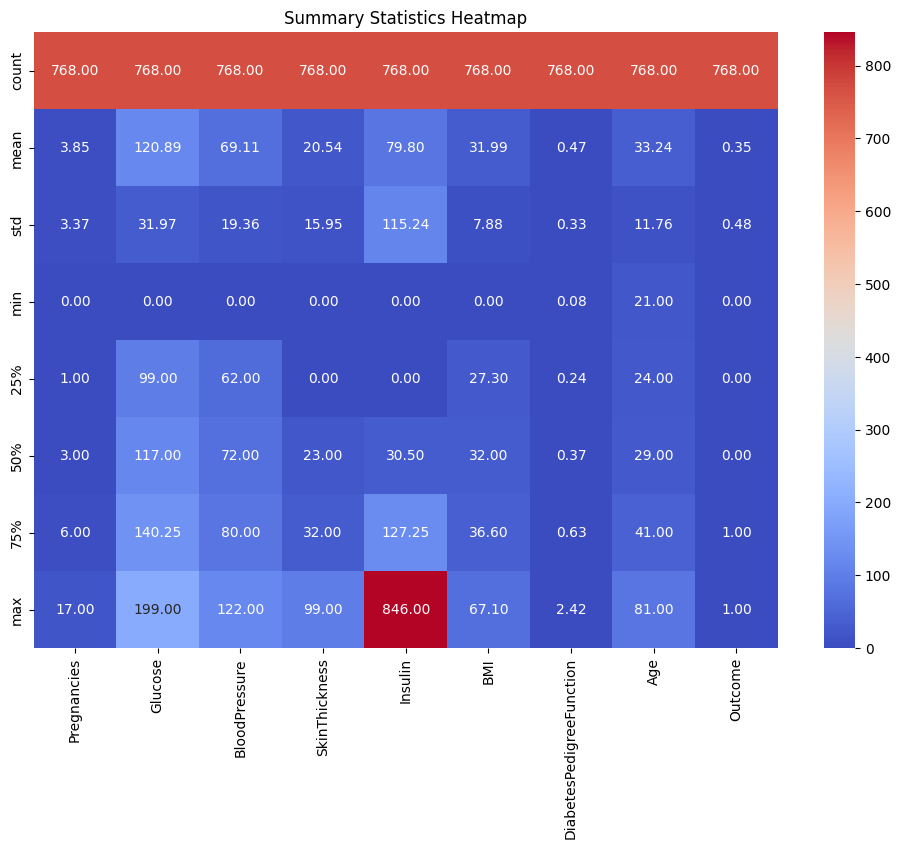

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

summary_stats = data.describe()

#plot a heatmap for the summary statistics
plt.figure(figsize=(12,8))
sns.heatmap(summary_stats, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Summary Statistics Heatmap')
plt.show()

# What Is a Seaborn Heatmap ?
A Seaborn heatmap is a visualization tool used to display data values in a matrix form, where the values are represented by color intensity. It helps make patterns, relationships, and differences in data easier to understand at a glance.

# What Does The Heatmap Tell Us ?
The heatmap reveals that although there are no missing values, several medical features contain zeros, which represent invalid or missing measurements. These unrealistic zeros must be addressed before modeling, as they can distort the distribution and reduce predictive accuracy. Additionally, extreme values such as the very high maximum insulin level suggest the presence of outliers that may require further cleaning

In [ ]:
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_with_zero:
    data[col] = data[col].replace(0, data[col].median())

     # This replaces 0s with the median of each column → best practice for medical datasets.

In [ ]:
data.describe()
# we should notice here that minimum values are no longer zero's. Medians and means have shifted slightly. Distributions look more accurate

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Features and Target
X = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
          'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = data['Outcome']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluation
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy:", accuracy)


Model Accuracy: 0.7662337662337663


# Building and Training the model (Logistic Regression)
To build a predictive model, it is essential to properly define and split the dataset. The target variable (Outcome) is assigned to y, while all other relevant features are stored in X. Using train_test_split, the data is divided into training and testing sets, with 80% allocated for training and 20% for testing. This division enables the model to learn from one subset of the data, while reserving another for unbiased evaluation. Lastly, verifying the shapes of these sets ensures proper data preparation for logistic regression training and validation, providing a solid foundation for evaluating model performance


Also the given code give's me a use for my 8 features, Predict the outcome, Train Logistic Regression, and provide me with Model Accuracy


Scaling makes sure that features measured in different units or ranges don’t overpower the model simply because they have larger numerical values. By putting all features on a similar scale, the model evaluates each one fairly and consistently. This also speeds up the optimization process, allowing the algorithm to reach its best solution more quickly and smoothly. As a result, model performance improves because every feature influences the outcome in a balanced and meaningful way.

In [ ]:
# Train Logistic Regression Model
model = LogisticRegression(max_iter=200) # Increase iteration to 200
model.fit(X_train, y_train)

# Predict on test data
predictions = model.predict(X_test)

# Print the Predictions
print("Predictions:", predictions)

Predictions: [0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


The code trains a logistic regression model using your training data, then uses that trained model to predict whether each person in the test set is diabetic or not. Finally, it prints the predictions (a list of 0s and 1s), showing the model’s estimated outcomes for each test sample.


We add the confusion matrix because accuracy alone does not tell the full story of how a classification model is performing.
A confusion matrix breaks down the predictions into TN, FP, FN, TP, which makes it possible to understand what kinds of mistakes the model is making.

In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", cm)

# Extract TN, FP, FN, TP
TN, FP, FN, TP = cm.ravel()

print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("True Positives (TP):", TP)

# Accuracy using TN, TP, FP, FN
accuracy = (TN + TP) / (TN + FP + FN + TP)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[82 17]
 [19 36]]
True Negatives (TN): 82
False Positives (FP): 17
False Negatives (FN): 19
True Positives (TP): 36
Accuracy: 0.7662337662337663


# Confusion Matrix
 A confusion matrix is used to evaluate the performance of a classification model by providing a detailed breakdown of its predictions rather than relying only on overall accuracy. It organizes results into four categories: true positives, true negatives, false positives, and false negatives, allowing us to see exactly how many predictions were correct and what types of errors the model made. This helps identify whether the model is missing important positive cases or producing too many false alarms. The confusion matrix also enables the calculation of key evaluation metrics such as precision, recall, specificity, and F1-score, which are especially important when the cost of different errors varies, such as in medical diagnosis. Overall, it offers a clearer and more informative assessment of model performance than accuracy alone.

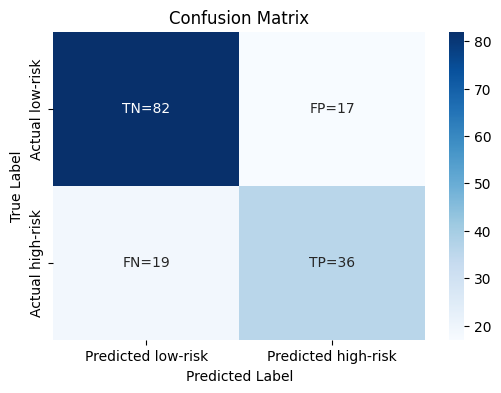

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix with updated labels
plt.figure(figsize=(6, 4))
sns.heatmap(
    data=cm, # Use the actual confusion matrix data
    annot=[[f"TN={TN}", f"FP={FP}"],
           [f"FN={FN}", f"TP={TP}"]],
    fmt="",
    cmap='Blues',
    xticklabels=['Predicted low-risk', 'Predicted high-risk'],
    yticklabels=['Actual low-risk', 'Actual high-risk']
)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**TN = 82, FP = 17, FN = 19, TP = 36**

**Total Samples = 159**



# What The Confusion Matrix Shows In Summary ?

That the model correctly classified most low-risk cases (82 true negatives) and a moderate number of high-risk cases (36 true positives), resulting in an overall accuracy of approximately 77%. However, the presence of 19 false negatives indicates that some diabetic cases were not detected, which is a critical concern in medical diagnosis. Additionally, 17 false positives suggest occasional overestimation of risk. Overall, while the model performs reasonably well, the confusion matrix highlights the need to improve detection of high-risk cases rather than focusing solely on accuracy.

In [ ]:
#Calculating the precision

from sklearn.metrics import precision_score

precision = round(precision_score(y_test, predictions),2)
print("Precision:", precision)

Precision: 0.68


In [ ]:
#Calculating the accuracy score

from sklearn.metrics import accuracy_score

accuracy = round(accuracy_score(y_test, predictions),2)
print("Accuracy:", accuracy)

Accuracy: 0.77


In [ ]:
from sklearn.metrics import recall_score

# Calculate recall
recall = recall_score(y_test, predictions)
print("Recall:", round(recall, 2))

Recall: 0.65


In [ ]:
#Calculating the F1 score

from sklearn.metrics import f1_score

f1 = round(f1_score(y_test, predictions),2)
print("F1-Score:", f1)


F1-Score: 0.67


# Explanation Summary
**Accuracy (77%)**: The model correctly predicted the outcome (Diabetic or Non-Diabetic) for 77 out of every 100 patients in my test set which is generally solid overall score, indicating the model is correct most of the time.


**Precision (68%)**: when the model predicts a patient has the high-risk condition.. It is 68% of the time correct.


**F1-Score (67%)**: The F1-Score is the harmonic mean of Precision and Recall. It provides a balanced measure, especially when dealing with uneven class distributions (like having many more non-diabetic people than diabetic people). An F1-Score of 0.67 is moderate

# Improvement Thought

The current model's performance on the Pima Indians Diabetes Dataset is moderate, with an Accuracy of 77%, Precision of 68%, and a critical Recall (Sensitivity) of 65%. This performance, achieved using a Logistic Regression Classifier, falls short of the desired benchmark for a medical application.

The low Recall score signifies a high rate of False Negatives (FN), meaning the model incorrectly predicts that 35% of truly diabetic patients are healthy. In this medical context, minimizing False Negatives is paramount, as missing a diagnosis (a Type II error) is the highest-risk error.

The underlying challenges stem from the dataset itself, including class imbalance and incorrectly encoded missing values (zeroes) in critical features like Blood Pressure and Glucose.

Therefore, the strategy moving forward must be a focused effort to increase Recall to acceptable clinical levels (e.g., 85%+) by addressing these data and model limitations, using a three-phase approach: Data Preprocessing, Addressing Class Imbalance, and Model Tuning/Exploration. This structured plan ensures a systematic pathway toward building a reliable diagnostic tool.

Talal Remal Rashad Al Shiekh Yassin
